In [6]:
#IMPORTS

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)


color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]
from fredapi import Fred



In [7]:
fred_key = 'c52f7b6c1d7b807702722feb130bdd21'

## 1. Create the fred object

In [8]:
fred= Fred(api_key=fred_key)

# 2. Search for economic data

In [13]:
sp_search=fred.search('S&P', order_by='popularity')

In [15]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2024-09-10,2024-09-10,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2024-09-06,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-09-09 09:17:10-05:00,92,The ICE BofA Option-Adjusted Spreads (OASs) ar...
CSUSHPINSA,CSUSHPINSA,2024-09-10,2024-09-10,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2024-06-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2024-08-27 08:12:01-05:00,88,"For more information regarding the index, plea..."
SP500,SP500,2024-09-10,2024-09-10,S&P 500,2014-09-10,2024-09-09,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2024-09-09 19:22:49-05:00,83,The observations for the S&P 500 represent the...
MEHOINUSA672N,MEHOINUSA672N,2024-09-10,2024-09-10,Real Median Household Income in the United States,1984-01-01,2022-01-01,Annual,A,2022 CPI-U-RS Adjusted Dollars,2022 CPI-U-RS Adjusted $,Not Seasonally Adjusted,NSA,2023-09-12 13:48:02-05:00,83,Household data are collected as of March. As ...
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2024-09-10,2024-09-10,ICE BofA US High Yield Index Effective Yield,1996-12-31,2024-09-06,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2024-09-09 09:17:09-05:00,82,This data represents the effective yield of th...


# 3. Pull raw data and Plot

In [17]:
sp500=fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500'}>

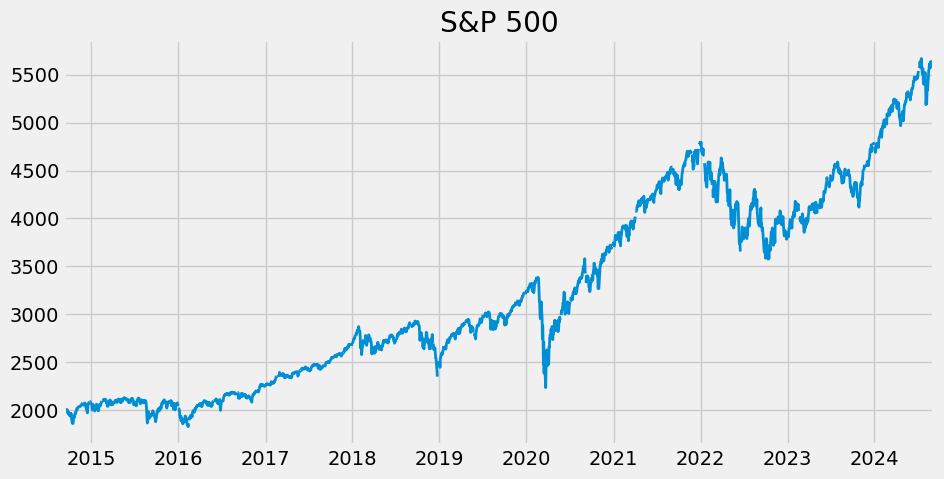

In [21]:
sp500.plot(figsize=(10,5), title='S&P 500', lw=2)

# 4. Pull and join multiple data series

In [23]:
unemployment_results= fred.search('unemployment')

In [24]:
unemployment_results

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-09-10,2024-09-10,Unemployment Rate,1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:46:02-05:00,95,The unemployment rate represents the number of...
UNRATENSA,UNRATENSA,2024-09-10,2024-09-10,Unemployment Rate,1948-01-01,2024-08-01,Monthly,M,Percent,%,Not Seasonally Adjusted,NSA,2024-09-06 07:46:18-05:00,58,The unemployment rate represents the number of...
UNEMPLOY,UNEMPLOY,2024-09-10,2024-09-10,Unemployment Level,1948-01-01,2024-08-01,Monthly,M,Thousands of Persons,Thous. of Persons,Seasonally Adjusted,SA,2024-09-06 07:47:03-05:00,71,The series comes from the 'Current Population ...
NROU,NROU,2024-09-10,2024-09-10,Noncyclical Rate of Unemployment,1949-01-01,2034-10-01,Quarterly,Q,Percent,%,Not Seasonally Adjusted,NSA,2024-07-01 12:01:04-05:00,69,"Starting with the July, 2021 report: An Update..."
CCSA,CCSA,2024-09-10,2024-09-10,Continued Claims (Insured Unemployment),1967-01-07,2024-08-24,"Weekly, Ending Saturday",W,Number,Number,Seasonally Adjusted,SA,2024-09-05 07:33:04-05:00,74,"Continued claims, also referred to as insured ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LAUCN340030000000003A,LAUCN340030000000003A,2024-09-10,2024-09-10,"Unemployment Rate in Bergen County, NJ",1990-01-01,2023-01-01,Annual,A,Percent,%,Not Seasonally Adjusted,NSA,2024-05-01 10:48:38-05:00,0,These data come from the Current Population Su...
LMUNRRTTLUM156S,LMUNRRTTLUM156S,2024-09-10,2024-09-10,Infra-Annual Registered Unemployment and Job V...,1995-01-01,2023-12-01,Monthly,M,Growth rate previous period,Growth rate previous period,Seasonally Adjusted,SA,2024-04-10 11:07:38-05:00,5,OECD Data Filters: REF_AREA: LUX MEASURE: REG...
LNS14000315,LNS14000315,2024-09-10,2024-09-10,Unemployment Rate - Married Women,1955-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:47:22-05:00,9,To obtain estimates of women worker employment...


In [25]:
unrate=fred.get_series('UNRATE')

In [26]:
unrate

1948-01-01    3.4
1948-02-01    3.8
1948-03-01    4.0
1948-04-01    3.9
1948-05-01    3.5
             ... 
2024-04-01    3.9
2024-05-01    4.0
2024-06-01    4.1
2024-07-01    4.3
2024-08-01    4.2
Length: 920, dtype: float64

In [31]:
unemp_df=fred.search('unemployment rate state', filter=('frequency','Monthly'))

In [40]:
unemp_df=unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df=unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [41]:
unemp_df

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
UNRATE,UNRATE,2024-09-10,2024-09-10,Unemployment Rate,1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:46:02-05:00,95,The unemployment rate represents the number of...
LNS14000006,LNS14000006,2024-09-10,2024-09-10,Unemployment Rate - Black or African American,1972-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:46:16-05:00,72,The series comes from the 'Current Population ...
CAUR,CAUR,2024-09-10,2024-09-10,Unemployment Rate in California,1976-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-20 12:36:01-05:00,64,None
TXUR,TXUR,2024-09-10,2024-09-10,Unemployment Rate in Texas,1976-01-01,2024-07-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-08-20 12:35:02-05:00,56,None
M0892AUSM156SNBR,M0892AUSM156SNBR,2024-09-10,2024-09-10,Unemployment Rate for United States,1929-04-01,1942-06-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:26:06-05:00,54,Series Is Presented Here As Three Variables--(...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
LNS14000026,LNS14000026,2024-09-10,2024-09-10,"Unemployment Rate - 20 Yrs. & over, Women",1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:47:25-05:00,6,To obtain estimates of women worker employment...
LNS14000048,LNS14000048,2024-09-10,2024-09-10,Unemployment Rate - 25 Yrs. & over,1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:47:25-05:00,6,The series comes from the 'Current Population ...
LNS14000089,LNS14000089,2024-09-10,2024-09-10,Unemployment Rate - 25-34 Yrs.,1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:47:34-05:00,6,The series comes from the 'Current Population ...


In [52]:
unemp_df.tail(4)

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
LNS14000048,LNS14000048,2024-09-10,2024-09-10,Unemployment Rate - 25 Yrs. & over,1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:47:25-05:00,6,The series comes from the 'Current Population ...
LNS14000089,LNS14000089,2024-09-10,2024-09-10,Unemployment Rate - 25-34 Yrs.,1948-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:47:34-05:00,6,The series comes from the 'Current Population ...
M08311USM156SNBR,M08311USM156SNBR,2024-09-10,2024-09-10,"Unemployment Rate, Married Males, Spouse Prese...",1954-11-01,1968-01-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2012-08-17 14:28:17-05:00,6,Beginning In 1960 Data Include Alaska And Hawa...
LNS14000150,LNS14000150,2024-09-10,2024-09-10,Unemployment Rate - Married Men,1955-01-01,2024-08-01,Monthly,M,Percent,%,Seasonally Adjusted,SA,2024-09-06 07:47:22-05:00,5,The series comes from the 'Current Population ...


In [46]:
all_results=[]

for myid in unemp_df.index:
     results = fred.get_series(myid)
     results=results.to_frame(name=myid)
     all_results.append(results)

In [54]:
final_df=pd.concat(all_results, axis=1).drop(['LNS14000150','M08311USM156SNBR','LNS14000089','LNS14000048'], axis=1)

In [56]:
final_df.columns

Index(['UNRATE', 'LNS14000006', 'CAUR', 'TXUR', 'M0892AUSM156SNBR',
       'LNS14000024', 'LNS14000031', 'M0892BUSM156SNBR', 'NYUR', 'U2RATE',
       'FLUR', 'LNS14000002', 'LNS14000009', 'LNS14000003', 'PAUR', 'OHUR',
       'LNS14000001', 'LNS14027660', 'MIUR', 'LNS14027662', 'ALUR',
       'LNS14024887', 'MAUR', 'NCUR', 'ILUR', 'NJUR', 'GAUR', 'COUR', 'AZUR',
       'WIUR', 'VAUR', 'KYUR', 'LRUN64TTUSM156S', 'SCUR', 'NMUR', 'MNUR',
       'TNUR', 'LNS14032183', 'LNS14000012', 'WAUR', 'LNS14027659', 'MDUR',
       'ORUR', 'WVUR', 'NVUR', 'ARUR', 'OKUR', 'MOUR', 'AKUR', 'IAUR', 'UTUR',
       'PRUR', 'INUR', 'LAUR', 'HIUR', 'LASMT261982000000003', 'NDUR', 'MTUR',
       'DCUR', 'MSUR', 'LNS14000060', 'LNS14000028', 'MEUR', 'NEUR',
       'LASMT391746000000003', 'CTUR', 'IDUR', 'NHUR', 'LNS14000018', 'RIUR',
       'KSUR', 'WYUR', 'DEUR', 'LNS14000036', 'VTUR', 'LNS14000032', 'SDUR',
       'CMWRUR', 'LNS14200000', 'LRUN24TTUSM156S', 'LNS14027689',
       'LNS14100000', 'LNS14000315', 

In [60]:
final_df=final_df.drop(['LNS14000006','M0892AUSM156SNBR','LNS14000024','LNS14000031','M0892BUSM156SNBR',
               'LNS14000002','LNS14000009','LNS14000003','LNS14000001','LNS14027660','LNS14027662',
               'LNS14024887','LNS14032183','LNS14000012','LNS14027659','LASMT261982000000003',
               'LNS14000060','LNS14000028','LASMT391746000000003','LNS14000018','LNS14000032',
               'LNS14000036','LRUN24TTUSM156S','LNS14200000','LNS14027689',
               'LNS14100000','LNS14000315','LNS14000029','LRHUTTTTUSM156S',
               'LNS14024230','LNS14000025','LNS14000061','LRUNTTTTUSM156S','LNS14000026','LRUN64TTUSM156S','UNRATE','U2RATE'], axis=1)

In [62]:
final_df=final_df.dropna(axis=1)

<Axes: >

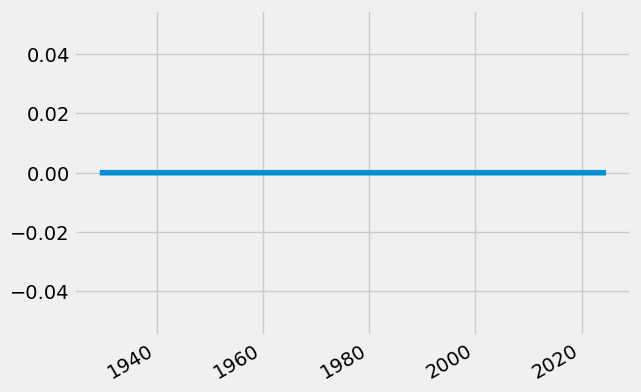

In [64]:
final_df.isna().sum(axis=1).plot()